# Simple Neural Network

## Activation functions
- Step function
$$
f(net) = 
\begin{cases}
1&ifnet>0\\
0&otherwise
\end{cases}
$$
- Sigmoid, ReLU, tanh, Leaky ReLU, ELU

# Perceptron
- Won't be able solve non-linear problems like XOR

In [1]:
import numpy as np
from matplotlib import pyplot as plt
class Perceptron:
    
    #N: number of columns in out input feature vectors.
    #alpha: learning rate
    def __init__(self, N, alpha=0.1):
        self.W = np.random.randn(N+1)/np.sqrt(N)
        self.alpha = alpha
        
    def step(self, x):
        return 1 if x>0 else 0
    
    def fit(self, X, y, epochs=10):
        X = np.c_[X, np.ones((X.shape[0]))]
        for epoch in np.arange(0, epochs):
            for(x, target) in zip(X,y):
                p = self.step(np.dot(x, self.W))
                if p!=target:
                    error = p-target
                    self.W += -self.alpha*error*x
    
    def predict(self, X, addBias=True):
        X = np.atleast_2d(X)
        
        if addBias:
            X = np.c_[X, np.ones((X.shape[0]))]

        return self.step(np.dot(X, self.W))

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

print("[INFO] training perceptron")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)

print("[INFO] testing perceptron")

for (x,target) in zip(X,y):
    pred = p.predict(x)
    print("[INFO] data={}, ground_truth={}, pred={}".format(x, target[0], pred))

[INFO] training perceptron
[INFO] testing perceptron
[INFO] data=[0 0], ground_truth=0, pred=1
[INFO] data=[0 1], ground_truth=1, pred=0
[INFO] data=[1 0], ground_truth=1, pred=0
[INFO] data=[1 1], ground_truth=0, pred=0


# Backprop and Multi-layer networks
- Consists of two phases:
    - The forward pass where our inputs sare passed through the network and output predictions obtained
    - Backgward pass where we compute the gradient of loss function at the final layer of the network and use this gradient to recursively apply chain rule to update the weights in our network.

In [3]:
class NeuralNetwork:
    #layers: list of integers which represents architecture of network
    def __init__(self, layers, alpha=0.1):
        self.W = []
        self.layers = layers
        self.alpha = alpha
    
        for i in np.arange(0, len(layers)-2):
            w = np.random.randn(layers[i]+1, layers[i+1]+1)
            self.W.append(w/np.sqrt(layers[i]))
        
        w = np.random.randn(layers[-2]+1, layers[-1])
        self.W.append(w/np.sqrt(layers[-2]))
        
    def __repr__(self):
        return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))
    
    def sigmoid(self, x):
        return 1.0/(1+np.exp(-x))
    
    def sigmoid_deriv(self, x):
        return x*(1-x)
    
    def fit(self, X, y, epochs=1000, displayUpdate=100):
        losses = []
        X = np.c_[X, np.ones((X.shape[0]))]
        
        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)
            if epoch==0 or (epoch+1)%displayUpdate==0:
                loss = self.calculate_loss(X, y)
                losses.append(loss)
                print("[INFO] epoch={} loss={}".format(epoch+1, loss))
                
    
    def fit_partial(self, x, y):
        A = [np.atleast_2d(x)]
        
        #forward pass
        for layer in np.arange(0, len(self.W)):
            net = A[layer].dot(self.W[layer])
            out = self.sigmoid(net)
            A.append(out)
            
        #backprop
        error = A[-1] - y
        D = [error * self.sigmoid_deriv(A[-1])]
        for layer in np.arange(len(A)-2, 0, -1):
            delta = D[-1].dot(self.W[layer].T)
            delta = delta*self.sigmoid_deriv(A[layer])
            D.append(delta)
        
        D = D[::-1]
        for layer in np.arange(0, len(self.W)):
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])
            
    def predict(self, X, addBias=True):
        p = np.atleast_2d(X)
        if addBias:
            p = np.c_[p, np.ones((p.shape[0]))]
        
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))
            
        return p
    
    def calculate_loss(self, X, targets):
        target = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = 0.5*np.sum((predictions-target)**2)
        
        return loss

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork([2,2,1], alpha=0.5)
losses = nn.fit(X, y, epochs=20000)

for (x, target) in zip(X,y):
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
        x, target[0], pred, step))

[INFO] epoch=1 loss=0.5383351538279486
[INFO] epoch=100 loss=0.4970644135632277
[INFO] epoch=200 loss=0.4909645281673761
[INFO] epoch=300 loss=0.47423932007361946
[INFO] epoch=400 loss=0.4307995584096955
[INFO] epoch=500 loss=0.3568891638870686
[INFO] epoch=600 loss=0.2576820532684784
[INFO] epoch=700 loss=0.12005272886930812
[INFO] epoch=800 loss=0.05522164540259251
[INFO] epoch=900 loss=0.03183246947274284
[INFO] epoch=1000 loss=0.021408223300547865
[INFO] epoch=1100 loss=0.015816275998677895
[INFO] epoch=1200 loss=0.012413613218819706
[INFO] epoch=1300 loss=0.010155156250165803
[INFO] epoch=1400 loss=0.008559562389522907
[INFO] epoch=1500 loss=0.007378441764553358
[INFO] epoch=1600 loss=0.006472066689244495
[INFO] epoch=1700 loss=0.005756373808530991
[INFO] epoch=1800 loss=0.005178004910604785
[INFO] epoch=1900 loss=0.004701580919859676
[INFO] epoch=2000 loss=0.00430277973543073
[INFO] epoch=2100 loss=0.003964363746202458
[INFO] epoch=2200 loss=0.0036737950088815904
[INFO] epoch=230

[INFO] epoch=18300 loss=0.00026813971556175284
[INFO] epoch=18400 loss=0.0002665771889786098
[INFO] epoch=18500 loss=0.00026503263965845463
[INFO] epoch=18600 loss=0.0002635057602750018
[INFO] epoch=18700 loss=0.000261996250450702
[INFO] epoch=18800 loss=0.0002605038165617744
[INFO] epoch=18900 loss=0.00025902817154975803
[INFO] epoch=19000 loss=0.0002575690347393831
[INFO] epoch=19100 loss=0.00025612613166237915
[INFO] epoch=19200 loss=0.0002546991938871565
[INFO] epoch=19300 loss=0.0002532879588540316
[INFO] epoch=19400 loss=0.0002518921697157866
[INFO] epoch=19500 loss=0.0002505115751834321
[INFO] epoch=19600 loss=0.0002491459293768995
[INFO] epoch=19700 loss=0.00024779499168053854
[INFO] epoch=19800 loss=0.00024645852660321293
[INFO] epoch=19900 loss=0.0002451363036428066
[INFO] epoch=20000 loss=0.00024382809715502708
[INFO] data=[0 0], ground-truth=0, pred=0.0050, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.9891, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.9881, step=1
[

In [5]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [6]:
print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO] samples: {}, dim: {}".format(data.shape[0], data.shape[1]))

[INFO] loading MNIST (sample) dataset...
[INFO] samples: 1797, dim: 64


In [7]:
(trainX, testX, trainY, testY) = train_test_split(data, digits.target,
                                                 test_size=0.25)

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [8]:
print("[INFO] training network")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

[INFO] training network
[INFO] NeuralNetwork: 64-32-16-10
[INFO] epoch=1 loss=605.2563899676646
[INFO] epoch=100 loss=8.477037843197895
[INFO] epoch=200 loss=2.806945568475169
[INFO] epoch=300 loss=0.9415671760240953
[INFO] epoch=400 loss=0.45918166539873645
[INFO] epoch=500 loss=0.31520693094873525
[INFO] epoch=600 loss=0.23985554606604687
[INFO] epoch=700 loss=0.19311655739514846
[INFO] epoch=800 loss=0.16128404044310404
[INFO] epoch=900 loss=0.13823065160411224
[INFO] epoch=1000 loss=0.12078448427548794


In [9]:
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        47
           4       0.98      0.96      0.97        50
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        53
           7       1.00      0.98      0.99        49
           8       0.97      0.90      0.94        40
           9       0.93      1.00      0.96        39

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# Multilayer networks with keras

In [10]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [22]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## MNIST

In [12]:
print("[INFO] accessing MNIST")
((trainX, trainY), (testX, testY)) = mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28*28*1))
testX = testX.reshape((testX.shape[0], 28*28*1))

trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32")/255.0

[INFO] accessing MNIST


### One Hot encoding
- Convert integer labels to vector labels.
- Example, if 10 classes, 0 to 9
$$
Integer label = 3
$$
$$
Vector label = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
$$
- This encoding may seem tedious, but many machine learning algorithms (including neural networks), benefit from this label representation. Luckily, most machine learning software packages provide a method/function to perform one-hot encoding, removing much of the tediou

In [13]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [15]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [18]:
print("[INFO] training network")
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

[INFO] training network
Epoch 1/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2847 - accuracy: 0.1593 - val_loss: 2.2470 - val_accuracy: 0.1998
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2150 - accuracy: 0.3712 - val_loss: 2.1743 - val_accuracy: 0.4414
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 2.1300 - accuracy: 0.5221 - val_loss: 2.0710 - val_accuracy: 0.5564
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 2.0061 - accuracy: 0.5951 - val_loss: 1.9186 - val_accuracy: 0.6554
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 1.8292 - accuracy: 0.6473 - val_loss: 1.7113 - val_accuracy: 0.6648
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 1.6092 - accuracy: 0.6823 - val_loss: 1.4801 - val_accuracy: 0.6937
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 1.3873 - accuracy: 0.7141 - val_loss: 1.270

Epoch 58/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3177 - accuracy: 0.9084 - val_loss: 0.3061 - val_accuracy: 0.9115
Epoch 59/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.9089 - val_loss: 0.3050 - val_accuracy: 0.9121
Epoch 60/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3142 - accuracy: 0.9097 - val_loss: 0.3029 - val_accuracy: 0.9126
Epoch 61/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3126 - accuracy: 0.9093 - val_loss: 0.3013 - val_accuracy: 0.9131
Epoch 62/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3109 - accuracy: 0.9100 - val_loss: 0.2999 - val_accuracy: 0.9143
Epoch 63/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3094 - accuracy: 0.9109 - val_loss: 0.2984 - val_accuracy: 0.9145
Epoch 64/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3078 - accuracy: 0.9108 - val_loss: 0.2973 - val_accuracy:

In [19]:
print("[INFO] evaluating network")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), 
                           predictions.argmax(axis=1),
                           target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.86      0.89       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.90      0.89       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



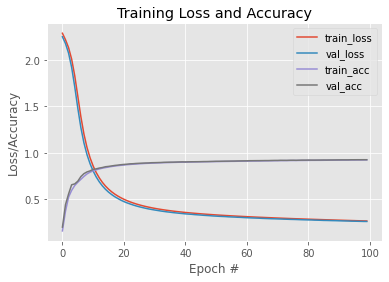

In [21]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## CIFAR-10

In [24]:
print("INFO loading cifar data")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
(train_n,w,h,c) = trainX.shape
(test_n, _, _, _) = testX.shape
trainX = trainX.reshape((train_n, w*h*c)).astype("float")/255.0
testX = testX.reshape((test_n, w*h*c)).astype("float")/255.0

INFO loading cifar data


In [25]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

labelNames = ["airplane", "automobile", "bird", "cat", "deer", 
              "dog", "frog", "horse", "ship", "truck"]

In [27]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [28]:
print("[INFO] training network")
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01),
             metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network
Epoch 1/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8383 - accuracy: 0.3444 - val_loss: 1.7365 - val_accuracy: 0.3754
Epoch 2/100
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6526 - accuracy: 0.4149 - val_loss: 1.6241 - val_accuracy: 0.4153
Epoch 3/100
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5691 - accuracy: 0.4437 - val_loss: 1.5486 - val_accuracy: 0.4426
Epoch 4/100
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5118 - accuracy: 0.4670 - val_loss: 1.5063 - val_accuracy: 0.4731
Epoch 5/100
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4615 - accuracy: 0.4832 - val_loss: 1.6501 - val_accuracy: 0.4087
Epoch 6/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4226 - accuracy: 0.4993 - val_loss: 1.4829 - val_accuracy: 0.4704
Epoch 7/100
1563/1563 [==============================] - 21s 13ms/step - loss: 1.3873 - accura

1563/1563 [==============================] - 19s 12ms/step - loss: 0.3670 - accuracy: 0.8804 - val_loss: 1.5867 - val_accuracy: 0.5538
Epoch 57/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3542 - accuracy: 0.8867 - val_loss: 1.6087 - val_accuracy: 0.5621
Epoch 58/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3343 - accuracy: 0.8948 - val_loss: 1.6646 - val_accuracy: 0.5455
Epoch 59/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3222 - accuracy: 0.8973 - val_loss: 1.7485 - val_accuracy: 0.5310
Epoch 60/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3121 - accuracy: 0.8997 - val_loss: 1.6541 - val_accuracy: 0.5576
Epoch 61/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2991 - accuracy: 0.9066 - val_loss: 1.6694 - val_accuracy: 0.5569
Epoch 62/100
1563/1563 [==============================] - 23s 15ms/step - loss: 0.2825 - accuracy: 0.9133 - val_loss: 1.8216 

In [30]:
print("INFO evaluating network")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                           predictions.argmax(axis=1), 
                          target_names=labelNames))

INFO evaluating network
              precision    recall  f1-score   support

    airplane       0.63      0.66      0.64      1000
  automobile       0.67      0.68      0.67      1000
        bird       0.45      0.45      0.45      1000
         cat       0.41      0.36      0.38      1000
        deer       0.51      0.49      0.50      1000
         dog       0.52      0.47      0.49      1000
        frog       0.58      0.64      0.61      1000
       horse       0.66      0.62      0.64      1000
        ship       0.65      0.71      0.68      1000
       truck       0.60      0.62      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



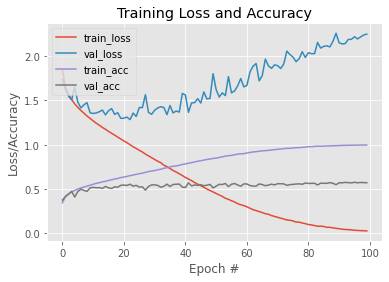

In [32]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# 10.1.5 Four Ingredients in Neural Network

## Dataset 

## Loss Function
- Cross entropy loss or binary crossentropy

## Model/Architecture


## Optimization Method
- RMSprop
- Adagrad
- Adadelta
- Adam
- SGD

# 10.1.6 Weight Initialization
- Constant initialization
    - W = np.zeros((64,32))
- Uniform and Normal distributions
    - W = np.random.uniform(low=-0.05, high=0.05, size=(64,32))
- LeChun Uniform and Normal
    - F_in = 64, F_out = 32
    - limit = np.sqrt(3/float(F_in))
    - W = np.random.uniform(low=-limit, high=limit, size=(F_in, F_out)
- Gloro/Xavier Uniform and Normal
- He etal/MSRA Uniform and Normal